In [22]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [23]:
# Setting up the default path

path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 4 - Python\01. Instacart Basket Analysis - June 2023'

In [24]:
# Importing the orders_products_ pkl file

df_orders_products_grouped = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_grouped.pkl'))

In [25]:
df_orders_products_grouped.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,daily_activity,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since,order_behavior_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer
1,2398795,1,prior,2,3,7,15.00,196,1,1,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer
2,473747,1,prior,3,3,12,21.00,196,1,1,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer
3,2254736,1,prior,4,4,7,29.00,196,1,1,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer
4,431534,1,prior,5,4,15,28.00,196,1,1,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer


In [ ]:
# Format the y-axis ticks as whole numbers

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

<Axes: >

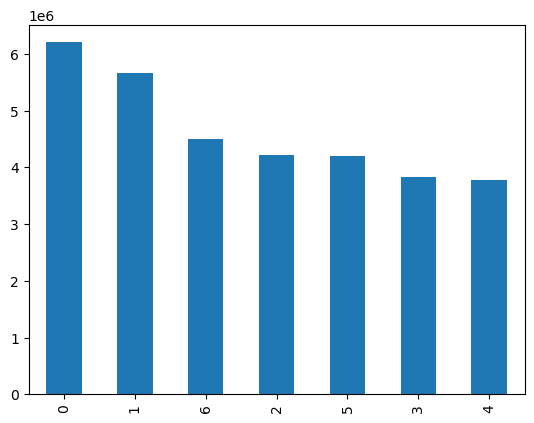

In [26]:
# Creating a bar chart for the orders_day_of_week frequencey

df_orders_products_grouped['order_dow'].value_counts().plot.bar()

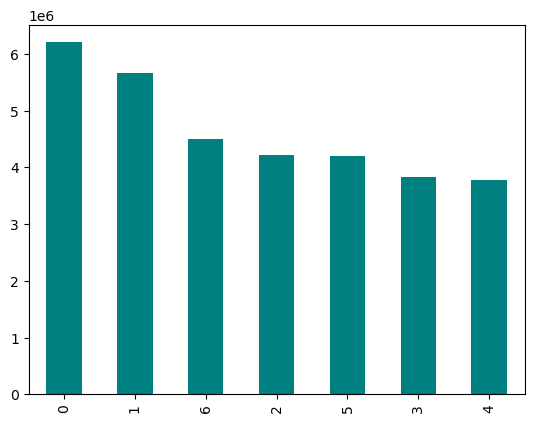

In [27]:
# Changing the color of the graph

bar = df_orders_products_grouped['order_dow'].value_counts().plot.bar(color = ['teal'])

In [28]:
# Exporting our bar chart

bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

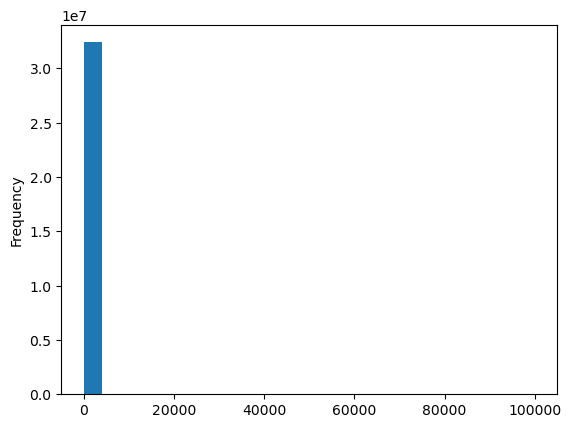

In [29]:
# Creating a histogram of the prices column

df_orders_products_grouped['prices'].plot.hist(bins = 25)

In [30]:
# Changing the decimal output 

pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
# Checking to see why we only got 1 bar in our histogram

df_orders_products_grouped['prices'].describe()

# Very strange that our max price is $99,999. That seems like an incorrect data point

count   32404859.00
mean          11.98
std          495.66
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

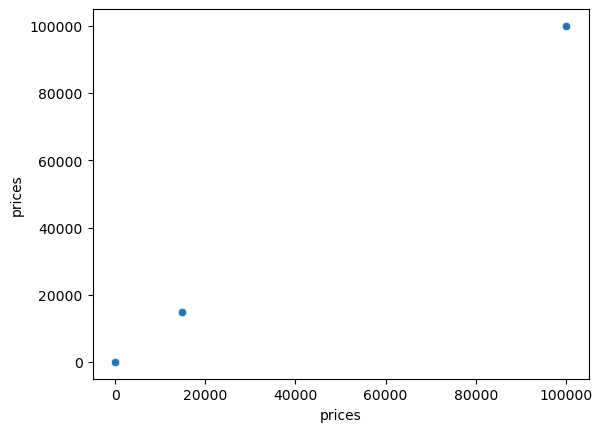

In [32]:
# Creating scatter plot of the prices column to check on this possible outlier 

sns.scatterplot(x = 'prices', y = 'prices',data = df_orders_products_grouped)

In [33]:
# Looking to see if there are any values are above the $100 for an item. 

df_orders_products_grouped.loc[df_orders_products_grouped['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,daily_activity,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since,order_behavior_flag
10030345,912404,17,prior,12,2,14,5.00,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
10030346,603376,17,prior,22,6,16,4.00,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
10030347,3264360,135,prior,2,2,21,13.00,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.79,High spender,12.00,Regular customer
10030348,892534,135,prior,3,0,8,12.00,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High spender,12.00,Regular customer
10030349,229704,342,prior,8,1,19,30.00,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.43,High spender,23.00,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.00,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.00,33664,1,1,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.00,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.15,High spender,5.00,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.00,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.38,High spender,12.00,Regular customer


In [34]:
# Assigning a NaN value to all the products with a price > $100

df_orders_products_grouped.loc[df_orders_products_grouped['prices'] >100, 'prices'] = np.nan

In [35]:
df_orders_products_grouped['prices'].max()

25.0

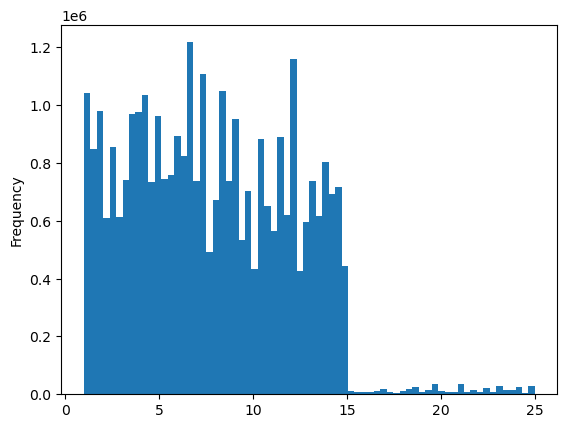

In [36]:
# Re-running the histogram to see how removing the outliers affected it

hist = df_orders_products_grouped['prices'].plot.hist(bins = 70)

In [37]:
# Exporting our histogram as a png image

hist.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'hist_prices.png'))

In [38]:
# Creating a sample of our dataset so we can run more visualzations.

np.random.seed(4)

dev = np.random.rand(len(df_orders_products_grouped)) <= 0.7

In [39]:
# Store 70% of the sample in the dataframe big

big = df_orders_products_grouped[dev]

In [40]:
# Store 30% of the sample in the dataframe small

small = df_orders_products_grouped[~dev]

In [41]:
# Creating a dataframe of our small sample, but only including the columns we want to plot
# order_dow and prices

df_2 = small[['order_dow','prices']]

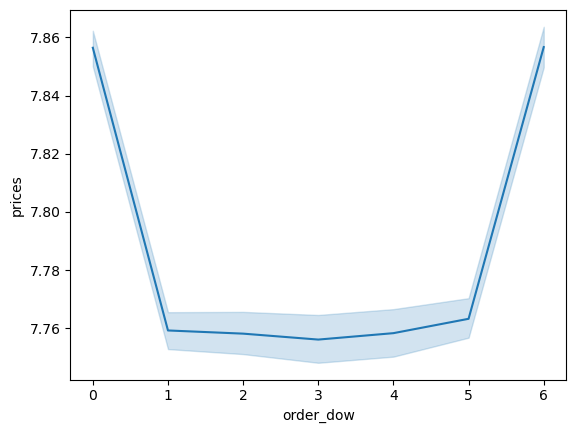

In [42]:
# Plotting our line chart with days of week on the x axis and prices on the y axis

line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')